# SARIMAモデル学習してみる
[こちら](https://logics-of-blue.com/python-time-series-analysis/)を参考に。

また、最後はAICベースでモデルを評価して最適な次数を計算するところまでやる。

In [23]:
# 基本のライブラリを読み込む
import numpy as np
import pandas as pd
from scipy import stats

# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# 統計モデル
import statsmodels.api as sm

In [24]:
# 以下のコードの方が読み込みは簡単
data = pd.read_csv('AirPassengers.csv', 
                   index_col='Month', 
                   parse_dates=True, 
                   dtype='float')
data.head()

,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [25]:
# 日付形式にする
ts = data['#Passengers'] 
ts.head()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
Name: #Passengers, dtype: float64

In [26]:
# データの取得方法その1
ts['1949-01-01']

112.0

In [27]:
# データの取得方法その2
from datetime import datetime
ts[datetime(1949,1, 1)]

112.0

In [28]:
# 1949年のデータをすべて取ってくる
ts['1949']

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
1949-06-01    135.0
1949-07-01    148.0
1949-08-01    148.0
1949-09-01    136.0
1949-10-01    119.0
1949-11-01    104.0
1949-12-01    118.0
Name: #Passengers, dtype: float64

In [29]:
ts.diff().head()

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
Name: #Passengers, dtype: float64

In [30]:
logDiff = np.log(ts) - np.log(ts.shift())
logDiff.dropna()

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
1949-07-01    0.091937
1949-08-01    0.000000
1949-09-01   -0.084557
1949-10-01   -0.133531
1949-11-01   -0.134733
1949-12-01    0.126294
1950-01-01   -0.025752
1950-02-01    0.091350
1950-03-01    0.112478
1950-04-01   -0.043485
1950-05-01   -0.076961
1950-06-01    0.175633
1950-07-01    0.131852
1950-08-01    0.000000
1950-09-01   -0.073203
1950-10-01   -0.172246
1950-11-01   -0.154151
1950-12-01    0.205444
1951-01-01    0.035091
1951-02-01    0.033902
1951-03-01    0.171148
1951-04-01   -0.088033
1951-05-01    0.053744
1951-06-01    0.034289
1951-07-01    0.111521
                ...   
1958-07-01    0.121098
1958-08-01    0.028114
1958-09-01   -0.223144
1958-10-01   -0.118092
1958-11-01   -0.146750
1958-12-01    0.083511
1959-01-01    0.066021
1959-02-01   -0.051293
1959-03-01    0.171542
1959-04-01   -0.024939
1959-05-01    0.058841
1959-06-01    0.116724
1959-

In [31]:
# 自己相関を求める
ts_acf = sm.tsa.stattools.acf(ts, nlags=40)
ts_acf

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

In [32]:
# 偏自己相関
ts_pacf = sm.tsa.stattools.pacf(ts, nlags=40, method='ols')
ts_pacf

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358,  0.8402143 ,  0.61268285, -0.66597616, -0.38463943,
        0.0787466 , -0.02663483, -0.05805221, -0.04350748,  0.27732556,
       -0.04046447,  0.13739883,  0.3859958 ,  0.24203808, -0.04912986,
       -0.19599778, -0.15443575,  0.04484465,  0.18371541, -0.0906113 ,
       -0.06202938,  0.34827092,  0.09899499, -0.08396793,  0.36328898,
       -0.17956662,  0.15839435,  0.06376775, -0.27503705,  0.2707607 ,
        0.32002003])

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


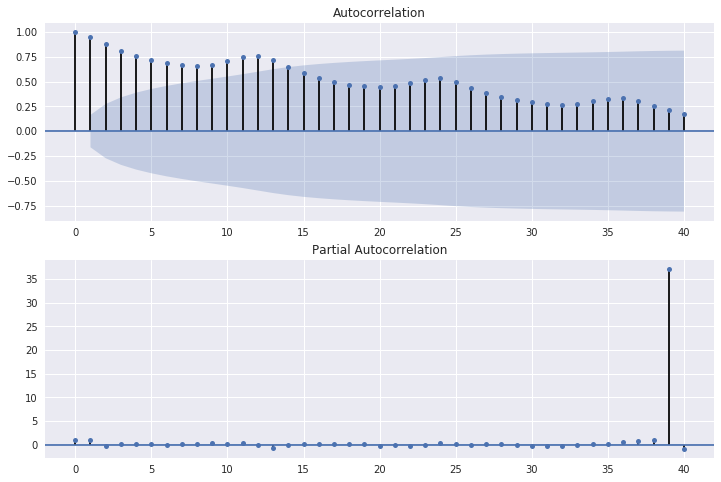

In [33]:
#  自己相関のグラフ
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=40, ax=ax1) # 自己相関
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts, lags=40, ax=ax2) # 偏自己相関

In [34]:
# たぶん和分過程なので、差分をとる
diff = ts - ts.shift()
diff = diff.dropna()

# 差分系列への自動ARMA推定関数の実行
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.arma_order_select_ic.html
# https://www.statsmodels.org/dev/_modules/statsmodels/tsa/stattools.html#arma_order_select_ic
resDiff = sm.tsa.arma_order_select_ic(diff, # data
                                      ic='aic', # 評価基準。BIC等も指定可能
                                      trend='nc' # トレンドの有無
                                     )
resDiff

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model

{'aic':              0            1            2
 0          NaN  1397.257791  1397.093436
 1  1401.852641  1412.615224  1385.496795
 2  1396.587654  1378.338024  1353.175729
 3  1395.021214  1379.614000  1351.138685
 4  1388.216680  1379.616584  1373.560615, 'aic_min_order': (3, 2)}

In [35]:
# P-3, q=2 が最善となったので、それをモデル化
from statsmodels.tsa.arima_model import ARIMA
ARIMA_3_1_2 = ARIMA(ts, order=(3, 1, 2)).fit(dist=False)
ARIMA_3_1_2.params

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const                  2.673500
ar.L1.D.#Passengers    0.261992
ar.L2.D.#Passengers    0.367828
ar.L3.D.#Passengers   -0.363473
ma.L1.D.#Passengers   -0.075068
ma.L2.D.#Passengers   -0.924864
dtype: float64

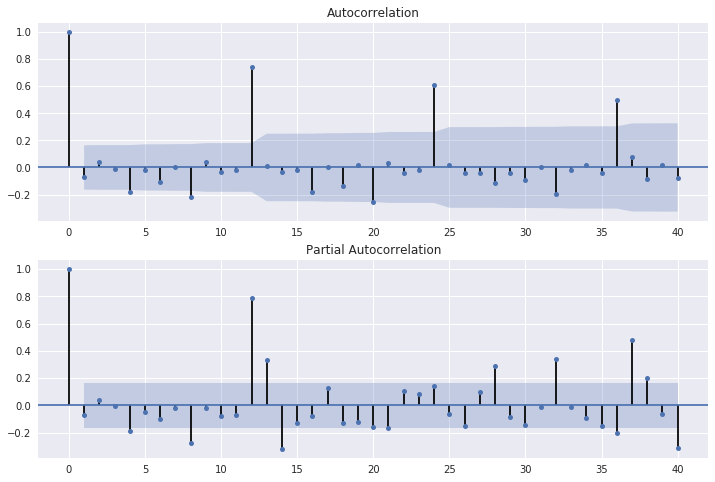

In [36]:
# 残差のチェック
# SARIMAじゃないので、周期性が残ってしまっている。。。
resid = ARIMA_3_1_2.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [38]:
# SARIMAXモデルを「決め打ち」で推定する
import statsmodels.api as sm

SARIMA_3_1_2_111 = sm.tsa.SARIMAX(ts, # data
                                  order=(3,1,2), # The (p,d,q) order of the model for the number of AR parameters
                                  seasonal_order=(1,1,1,12) # The (P,D,Q,s) order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity
                                 ).fit()
print(SARIMA_3_1_2_111.summary())

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(3, 1, 2)x(1, 1, 1, 12)   Log Likelihood                -502.966
Date:                            Tue, 01 Jan 2019   AIC                           1021.933
Time:                                    05:52:55   BIC                           1044.934
Sample:                                01-01-1949   HQIC                          1031.279
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6889      1.566      0.440      0.660      -2.381       3.759
ar.L2          0.1976      0.932   

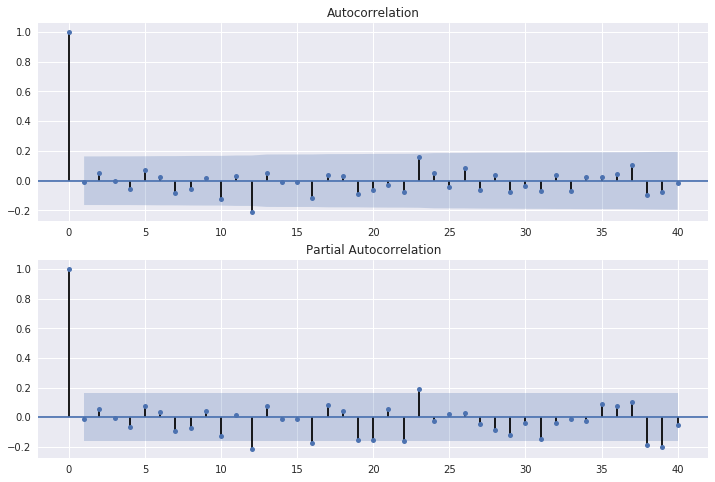

In [39]:
# 残差のチェック
# 残渣に自己相関が残っていないことを確認する。
residSARIMA = SARIMA_3_1_2_111.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residSARIMA.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=40, ax=ax2)

モデルが組めたので、予測する

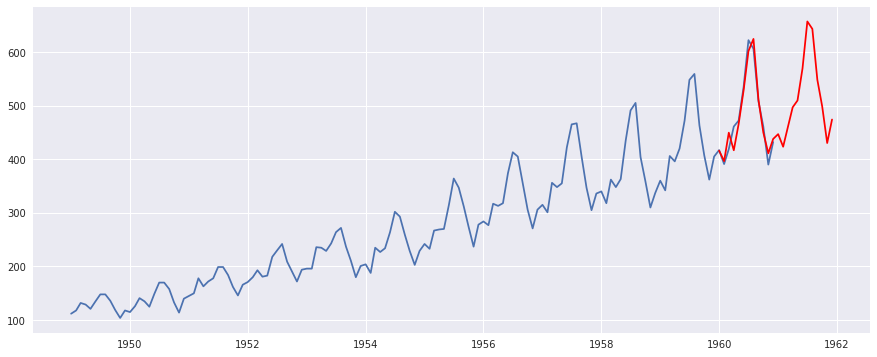

In [40]:
# 予測
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.predict.html
pred = SARIMA_3_1_2_111.predict(start='1960-01-01', # start:Zero-indexed observation number at which to start forecasting
                                end='1961-12-01') # end:Zero-indexed observation number at which to end forecasting

# 実データと予測結果の図示
plt.plot(ts)
plt.plot(pred, "r")

SARIMAモデルの次数を決定する。  
総当たりで次数を変えていき、AICを計算し、比較をしていく

In [43]:
# 総当たりで、AICが最小となるSARIMAの次数を探す
# Gridsearch形式
'''
ARIMA(p, d, q)
季節(sp, sd, sq)
pは自己回帰モデルの次数：AR(p)、
qは移動平均モデルの次数：MA(q)、
dは差分をとる回数：I(d)
です。
'''

max_p = 3
max_q = 3
max_d = 1
max_sp = 1
max_sq = 1
max_sd = 1

pattern = max_p*(max_q + 1)*(max_d + 1)*(max_sp + 1)*(max_sq + 1)*(max_sd + 1)

modelSelection = pd.DataFrame(index=range(pattern), columns=["model", "aic"])
pattern # 計算するパターン数

192

In [44]:
# 自動SARIMA選択
num = 0

for p in range(1, max_p + 1):
    for d in range(0, max_d + 1):
        for q in range(0, max_q + 1):
            for sp in range(0, max_sp + 1):
                for sd in range(0, max_sd + 1):
                    for sq in range(0, max_sq + 1):
                        sarima = sm.tsa.SARIMAX( # https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html
                            ts, order=(p,d,q), # ARIMA(p, d, q)
                            seasonal_order=(sp,sd,sq,12), # The (P,D,Q,s) order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity
                            enforce_stationarity = False, # 定常性を仮定しない
                            enforce_invertibility = False　# MAで反転可能条件を仮定しない
                        ).fit()
                        modelSelection.ix[num]["model"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), season=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                        modelSelection.ix[num]["aic"] = sarima.aic
                        num = num + 1

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWar

In [45]:
# AIC最小モデル
modelSelection[modelSelection.aic == min(modelSelection.aic)]

,model,aic
187,"order=(3,1,3), season=(0,1,1)",898.105


In [47]:
#　AICが最小の次数でモデルを学習し直す
bestSARIMA = sm.tsa.SARIMAX(ts, order=(3,1,3), seasonal_order=(0,1,1,12), enforce_stationarity = False, enforce_invertibility = False).fit()

print(bestSARIMA.summary())

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(3, 1, 3)x(0, 1, 1, 12)   Log Likelihood                -441.052
Date:                            Tue, 01 Jan 2019   AIC                            898.105
Time:                                    06:11:51   BIC                            920.064
Sample:                                01-01-1949   HQIC                           907.018
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2231      0.097     -2.302      0.021      -0.413      -0.033
ar.L2         -0.1642      0.108   

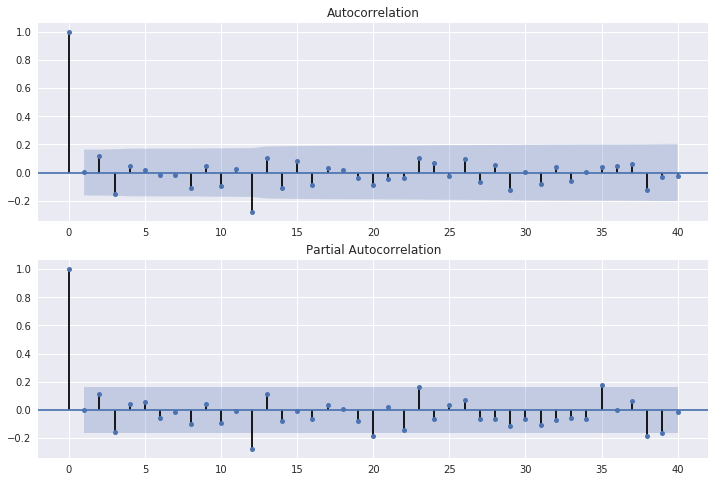

In [48]:
# 残差のチェック
residSARIMA = bestSARIMA.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residSARIMA, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=40, ax=ax2)

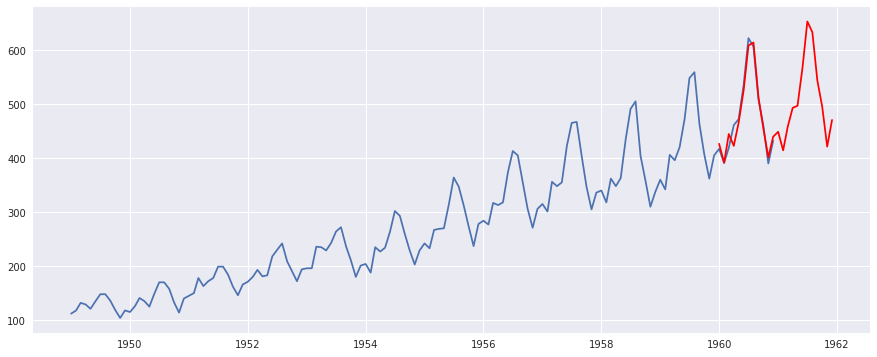

In [50]:
# 予測
bestPred = bestSARIMA.predict(start='1960-01-01', end='1961-12-01')
# 実データと予測結果の図示
plt.plot(ts)
plt.plot(bestPred, "r")